# **BLINKIT DATA ANALYSIS PROJECT**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/varap/Desktop/Vara Professional/Python for DA/Blinkit_Project/blinkit_data.csv")

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [19]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [14]:
df.shape

(8523, 12)

In [17]:
print("Size of the Dataset:", df.shape)

Size of the Dataset: (8523, 12)


In [21]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [26]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [27]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [5]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'
                                                        })

In [6]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [7]:
#Total Sales
total_sales = df['Sales'].sum()

#Averaga Sales
avg_sales = df['Sales'].mean()

#No of items sold
total_item_sold = df['Sales'].count()

#average rating

avg_ratings = df['Rating'].mean()

print("Total Sales:", round(total_sales))
print("Average Sales:", round(avg_sales))
print("Total Item Sold:", total_item_sold)
print("Average Ratings:",round(avg_ratings))

Total Sales: 1201681
Average Sales: 141
Total Item Sold: 8523
Average Ratings: 4


In [8]:
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${avg_sales:,.2f}")
print(f"Total Item Sold: {total_item_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:.1f}")

Total Sales: $1,201,681.48
Average Sales: $140.99
Total Item Sold: 8,523
Average Ratings: 4.0


<function matplotlib.pyplot.show(close=None, block=None)>

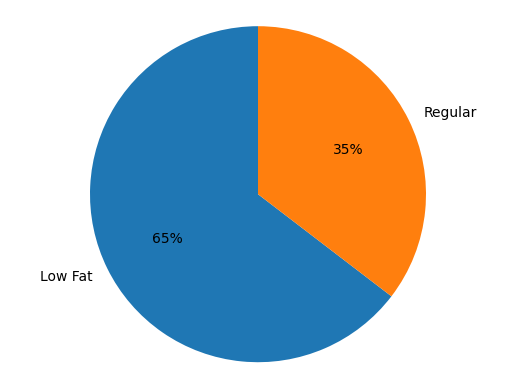

In [9]:
sales_by_fat = df.groupby('Item Fat Content') ['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.0f%%', startangle = 90)
plt.axis('equal')
plt.show

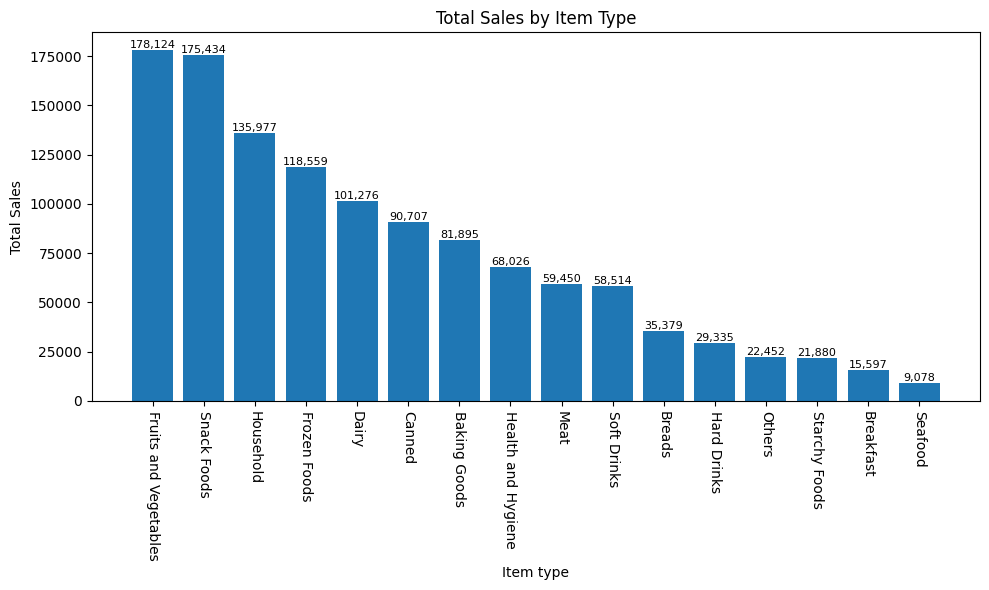

In [10]:
sales_by_type = df.groupby('Item Type') ['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [73]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

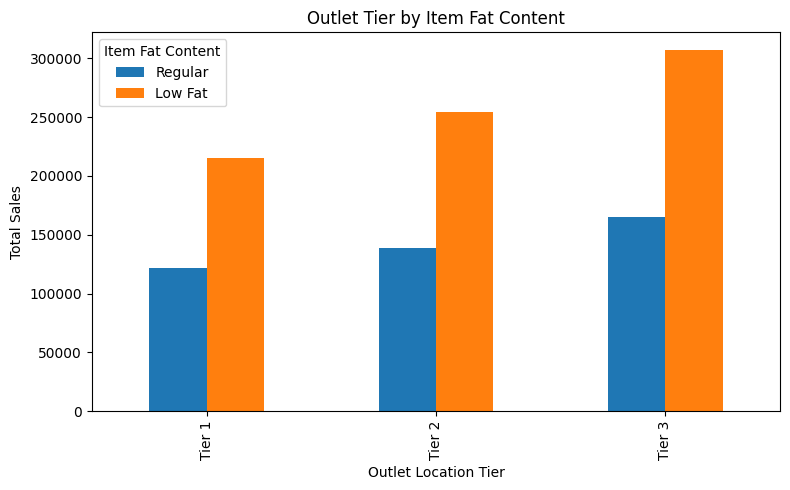

In [77]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8, 5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

In [78]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

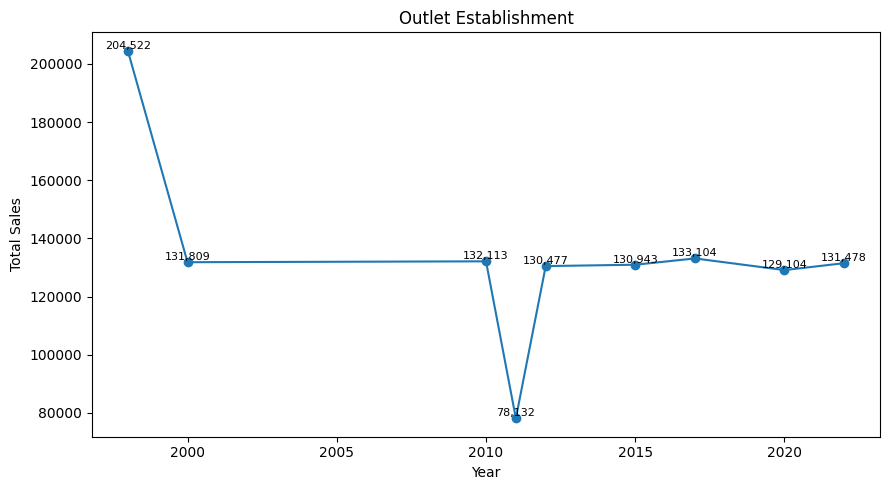

In [11]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker ='o', linestyle ='-')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
    

plt.tight_layout()
plt.show()

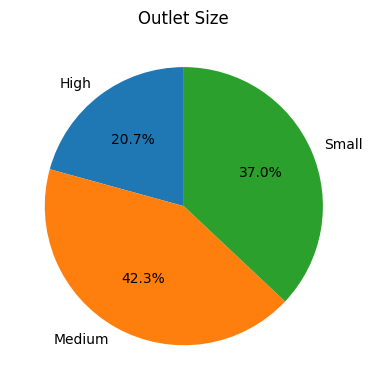

In [12]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

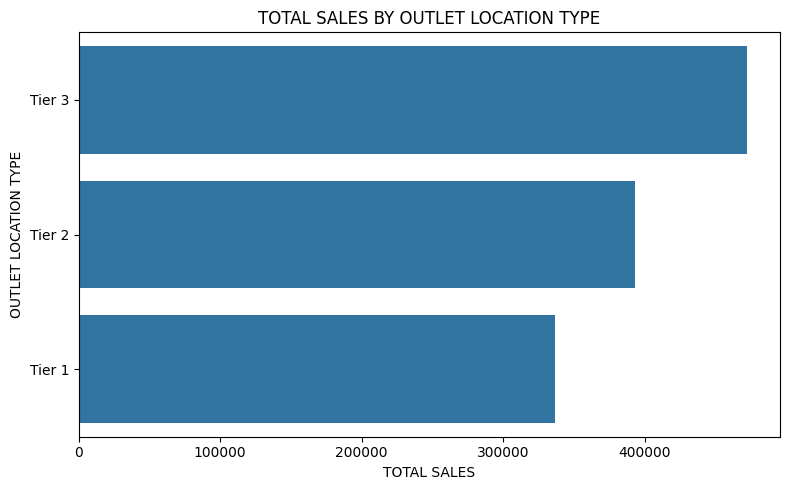

In [13]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('TOTAL SALES BY OUTLET LOCATION TYPE')
plt.xlabel('TOTAL SALES')
plt.ylabel('OUTLET LOCATION TYPE')

plt.tight_layout()
plt.show()